In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/heights.csv')
df

,name,height
0,Ali,5.9
1,Awais,5.2
2,Sara,5.1
3,Ayesha,5.5
4,Mehwish,4.9
5,Raza,5.4
6,Safdar,6.2
7,Ahtsham,6.5
8,Binish,7.1
9,imran,14.5


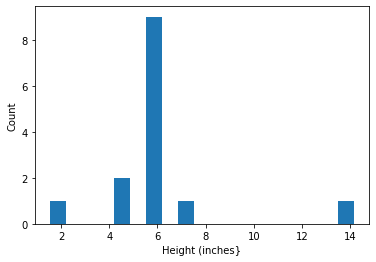

In [ ]:
plt.hist(df.height, bins=10, rwidth=0.5)
plt.xlabel('Height (inches}')
plt.ylabel('Count')
plt.show()

In [ ]:
df.height.min()

1.2

In [ ]:
df.height.max()

14.5

In [ ]:
df.height.describe()

count    14.000000
mean      6.050000
std       2.779804
min       1.200000
25%       5.250000
50%       5.550000
75%       6.175000
max      14.500000
Name: height, dtype: float64

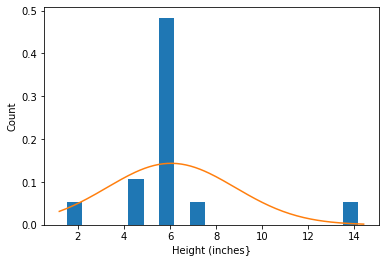

In [ ]:
from scipy.stats import norm

plt.hist(df.height, bins=10, rwidth=0.5, density=True)
plt.xlabel('Height (inches}')
plt.ylabel('Count')

range= np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(range, norm.pdf(range,df.height.mean(),df.height.std()))

In [ ]:
df['height'].mean()

6.05

In [ ]:
df['height'].std()

2.779803534839772

In [ ]:
UP=df['height'].mean()+1*df.height.std()
UP

8.829803534839773

In [ ]:
LL=df['height'].mean()-1*df['height'].std()
LL

3.270196465160228

In [ ]:
new_df=df[(df['height']>LL)&(df['height']<UP)]
print(new_df)

       name  height
0       Ali     5.9
1     Awais     5.2
2      Sara     5.1
3    Ayesha     5.5
4   Mehwish     4.9
5      Raza     5.4
6    Safdar     6.2
7   Ahtsham     6.5
8    Binish     7.1
10     jose     6.1
11      Zia     5.6
13     Iqra     5.5


# **Outlier Removal & Detection using Z-score**
Z score shows that a data point is away from how many standard deviation

In [ ]:
df['zscore']= (df['height']-df['height'].mean())/df['height'].std()
df

,name,height,zscore
0,Ali,5.9,-0.053961
1,Awais,5.2,-0.305777
2,Sara,5.1,-0.341751
3,Ayesha,5.5,-0.197856
4,Mehwish,4.9,-0.413698
5,Raza,5.4,-0.233829
6,Safdar,6.2,0.053961
7,Ahtsham,6.5,0.161882
8,Binish,7.1,0.377725
9,imran,14.5,3.039783


In [ ]:
df[df.zscore>1]

,name,height,zscore
9,imran,14.5,3.039783


In [ ]:
df[df.zscore<-1]

,name,height,zscore
12,yousof,1.2,-1.744728


In [ ]:
new_df=df[(df['zscore']>-1)&(df['zscore']<1)]
print(new_df)

       name  height    zscore
0       Ali     5.9 -0.053961
1     Awais     5.2 -0.305777
2      Sara     5.1 -0.341751
3    Ayesha     5.5 -0.197856
4   Mehwish     4.9 -0.413698
5      Raza     5.4 -0.233829
6    Safdar     6.2  0.053961
7   Ahtsham     6.5  0.161882
8    Binish     7.1  0.377725
10     jose     6.1  0.017987
11      Zia     5.6 -0.161882
13     Iqra     5.5 -0.197856


# **Outlier Removal of House Pricing Dataset using Z-Score**

In [ ]:
ds=pd.read_csv('/content/bhp.csv')
ds

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


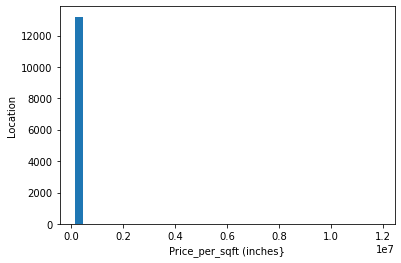

In [ ]:
plt.hist(ds.price_per_sqft, bins=20, rwidth=0.5)
plt.xlabel('Price_per_sqft (inches}')
plt.ylabel('Location')
plt.show()

In [ ]:
ds.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
ds['price_per_sqft'].mean()

7920.336742424242

In [ ]:
ds['price_per_sqft'].std()

106727.16032810845

In [ ]:
upl=ds['price_per_sqft'].mean()+3*ds['price_per_sqft'].std()
lol=ds['price_per_sqft'].mean()-3*ds['price_per_sqft'].std()
(lol,upl)

(-312261.1442419011, 328101.8177267496)

In [ ]:
new_ds=ds[(ds['price_per_sqft']>lol)&(ds['price_per_sqft']<upl)]
new_ds

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407
